<a href="https://colab.research.google.com/github/seokjinwoo/EconBigData/blob/main/lec12_%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 텍스트 마이닝(text mining)

- 데이터 마이닝(data mining)에서 가져온 이름
  - 데이터 채굴
  - text as data

- NLP(natural language process) 자연어 처리
- 텍스트의 경우에는 순서가 중요. 종속성(dependency)
- 시계열과 같은 특성.
- 앞의 단어가 있으면, 바로 뒷 단어를 예측할 수 있음
- 최근까지는 많은 시계열 모형이 사용이 되었음

- 2017년에 attention mechanism이 개발되었음
  - "Attention is all you need"


## Bag of Words

- 토큰(단어, 명사)을 추출해서, 토큰의 분포를 추정해서 분석에 활용

- federalist papers

### 한글 말뭉치(corpus)

- 네이버 영화 리뷰 데이터셋(naver sentiment movie corpus)
  - 댓글 20만개 정도(train 15만개, test 5만개)

In [ ]:
# !pip install Korpora

In [ ]:
from Korpora import Korpora

nsmc = Korpora.load('nsmc')

In [ ]:
import pandas as pd

df_train = pd.DataFrame({
    'text': nsmc.train.texts,
    'label': nsmc.train.labels
})

df_train = df_train.head(1000)
df_train.tail()

,text,label
995,미달이는.. 연예계를 바라보는 태도를 고쳐야 한다.,0
996,파괴된 관객들.,0
997,알콜중독자들 덕에 평점이 낮은가?,1
998,중견배우들이 만들어놓은 긴장감이 나름 긴장감있게 싸워보려했던 도술사들에 의해 헛웃음...,0
999,남자 주인공 늑대 인간으로 변하고 끝나네유. 평점 보고 안 볼까 하다가 봤는디 재밌...,1


In [ ]:
# 텍스트 전처리(pre-processing)
# 텍스트를 정제(cleaning)
# 특수 문자를 제거

# 한글, 영어(대문자/소문자), 숫자 를 제외하고 나머지는 제거
# 텍스트의 패턴을 정의하는 거: 정규식(regular expression)

import re

# 특수기호 제거를 위한 함수를 정의
# 함수: y = f(x)
# x:input, f 를 거쳐서, y: output

def clean_text(text):
  # 한글, 숫자, 영문자(대/소), 공백 을 제외한 모든 문자 제거
  text = re.sub(r'[^가-힣0-9a-zA-Z\s]', '', text)
  return text

df_train['text'] = df_train['text'].apply(clean_text)

In [ ]:
print(df_train['text'].head())

0                                    아 더빙 진짜 짜증나네요 목소리
1                           흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나
2                                    너무재밓었다그래서보는것을추천한다
3                            교도소 이야기구먼 솔직히 재미는 없다평점 조정
4    사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...
Name: text, dtype: object


In [ ]:
# 문장을 토큰화(tokenization)
# 단어, 품사별로 토큰화, 띄어쓰기로 토큰화

# 형태소 분석기
# 상당히 다양함(nltk, spacy, konlpy)

# konlpy에 있는 Okt(open korean text) 라는 형태소 분석기를 사용
# twitter 분석용으로 개발이 된 것임


!pip install konlpy

In [ ]:
from konlpy.tag import Okt

okt = Okt()

text = '우석진 교수님 짱이닷!'

print(okt.morphs(text))

['우석', '진', '교수', '님', '짱', '이', '닷', '!']


In [ ]:
# df_train['text'].apply(okt.pos)

In [ ]:
# 텍스트의 형태소를 추출

okt = Okt()

# 형태소를 추출하는 함수

def extract_morphs(text):
  morphs = okt.morphs(text)
  return morphs

df_train['morphs'] = df_train['text'].apply(extract_morphs)


In [ ]:
# 명사만 추출함

df_train['명사'] = df_train['text'].apply(okt.nouns)

In [ ]:
df_train.head()

,text,label,morphs,명사
0,아 더빙 진짜 짜증나네요 목소리,0,"[아, 더빙, 진짜, 짜증나네요, 목소리]","[더빙, 진짜, 목소리]"
1,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1,"[흠, 포스터, 보고, 초딩, 영화, 줄, 오버, 연기, 조차, 가볍지, 않구나]","[흠, 포스터, 보고, 초딩, 영화, 줄, 오버, 연기]"
2,너무재밓었다그래서보는것을추천한다,0,"[너, 무재, 밓었, 다그, 래서, 보는것을, 추천, 한, 다]","[무재, 밓었, 다그, 래서, 추천]"
3,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0,"[교도소, 이야기, 구먼, 솔직히, 재미, 는, 없다, 평점, 조정]","[교도소, 이야기, 구먼, 재미, 평점, 조정]"
4,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1,"[사이, 몬페, 그, 의, 익살스런, 연기, 가, 돋보였던, 영화, 스파이더맨, 에...","[몬페, 의, 연기, 영화, 스파이더맨, 커스틴, 던스트]"


In [ ]:
# 리뷰 마다 몇 개의 형태소가 포함되어 있는지를 계산

okt = Okt()

def count_words(text):
  words = okt.morphs(text)
  return len(words)

df_train['word_count'] = df_train['text'].apply(count_words)

df_train.head()

,text,label,morphs,명사,word_count
0,아 더빙 진짜 짜증나네요 목소리,0,"[아, 더빙, 진짜, 짜증나네요, 목소리]","[더빙, 진짜, 목소리]",5
1,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1,"[흠, 포스터, 보고, 초딩, 영화, 줄, 오버, 연기, 조차, 가볍지, 않구나]","[흠, 포스터, 보고, 초딩, 영화, 줄, 오버, 연기]",11
2,너무재밓었다그래서보는것을추천한다,0,"[너, 무재, 밓었, 다그, 래서, 보는것을, 추천, 한, 다]","[무재, 밓었, 다그, 래서, 추천]",9
3,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0,"[교도소, 이야기, 구먼, 솔직히, 재미, 는, 없다, 평점, 조정]","[교도소, 이야기, 구먼, 재미, 평점, 조정]",9
4,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1,"[사이, 몬페, 그, 의, 익살스런, 연기, 가, 돋보였던, 영화, 스파이더맨, 에...","[몬페, 의, 연기, 영화, 스파이더맨, 커스틴, 던스트]",20


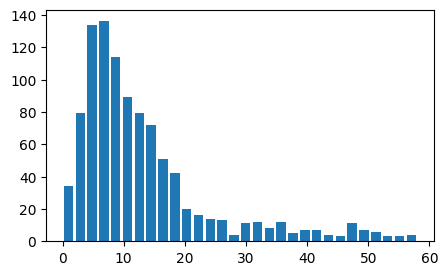

In [ ]:
# word_count 의 히스토그램을 그려보시오.

import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
plt.hist(df_train['word_count'], bins=30, rwidth=0.8)
plt.show()


In [ ]:
# 명사(noun)의 갯수를 센다.

df_train['noun'] = df_train['text'].apply(okt.nouns)

# df_train['noun'].head()

# 다음과 같은 2단계 loop을 돌린다.

all_nouns = [ noun  for sublist in df_train['noun']  for noun in sublist  ]

In [ ]:
import collections

word_counts = collections.Counter(all_nouns)
# word_counts

In [ ]:
# word_counts 를 이용해서
# 가장 자주 사용된 10개의 명사를 가로 바 그래프로 ㄱ려보시오.
# 작은 값에서 큰 값 순으로 정렬해서 그리시오.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

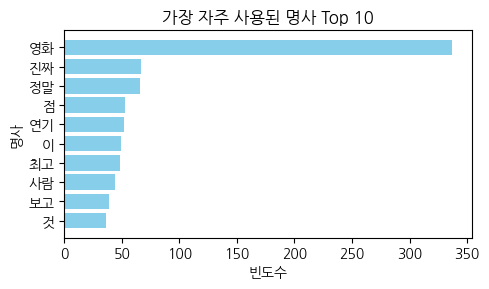

In [ ]:
# 폰트 설치 및 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 런타임 다시 시작 필요 안내 (실제 실행 시에는 주석 처리)
# print("런타임 다시 시작 필요: '런타임 > 런타임 다시 시작'을 클릭하세요.")

# NanumGothic 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

# 가장 자주 사용된 10개의 명사를 가져옵니다.
top_10_nouns = word_counts.most_common(10)

# 작은 값에서 큰 값 순으로 정렬합니다.
top_10_nouns_sorted = sorted(top_10_nouns, key=lambda x: x[1])

# 명사와 빈도를 분리합니다.
nouns = [item[0] for item in top_10_nouns_sorted]
counts = [item[1] for item in top_10_nouns_sorted]

# 가로 바 그래프를 그립니다.
plt.figure(figsize=(5, 3))
plt.barh(nouns, counts, color='skyblue')
plt.xlabel('빈도수')
plt.ylabel('명사')
plt.title('가장 자주 사용된 명사 Top 10')
plt.tight_layout()
plt.show()

In [ ]:
# 명사의 빈도수를 시각화 하는 방법
# 워드 클라우드
# 단어 빈도 시각화 툴 중 가장 인기있는 툴

# !pip install wordcloud

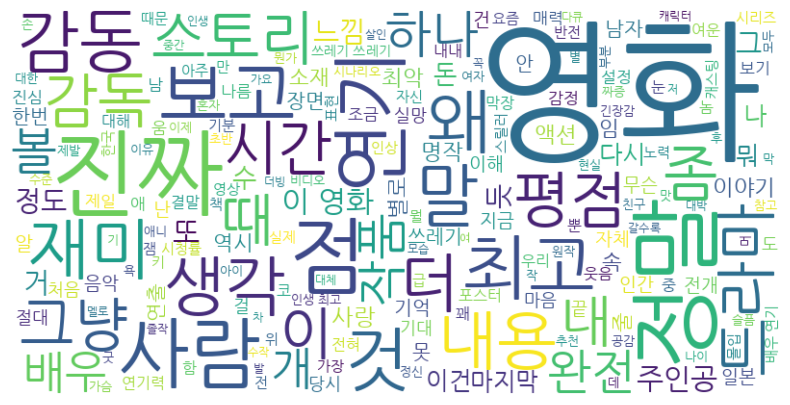

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text_for_wordcloud = ' '.join(all_nouns)

# NanumGothic 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    font_path=font_path # Add font_path for Korean support
    ).generate(text_for_wordcloud)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()